# Homework 4 
## Due Thursday Mar. 13th

### Exercise 8.1: A low-pass filter

Exercise 8.1 in your book shows a simple circuit. This circuit acts as a low-pass filter: you send a signal in on the left and it comes out filtered on the right.

Using Ohm's law and the capacitor law and assuming that the output load has
very high impedance, so that a negligible amount of current flows through
it, we can write down the equations governing this circuit as follows.  Let
$I$ be the current that flows through $R$ and into the capacitor, and let
$Q$ be the charge on the capacitor.  Then:

$$
IR = V_\textrm{in} - V_\textrm{out}\,,\qquad
 Q = CV_\textrm{out}\,,\qquad
 I = {dQ\over dt}.
$$

Substituting the second equation into the third, then substituting the
result into the first equation, we find that $V_\textrm{in} -
V_\textrm{out} = RC\>({dV_\textrm{out}/dt})$, or equivalently

$$
{dV_\textrm{out}\over dt} = {1\over RC}
                               \bigl( V_\textrm{in} - V_\textrm{out} \bigr).
$$


- Write a program (or modify a previous one) to solve this equation for
  $V_\textrm{out}(t)$ using the fourth-order Runge-Kutta method when in
  the input signal is a square-wave with frequency $\sim 1$ and amplitude $\sim 1$:
$$
V_\textrm{in}(t) = \begin{cases}
                     1  & \text{if $\lfloor 2t \rfloor$ is even,} \\
                     -1 & \text{if $\lfloor 2t \rfloor$ is odd,}
                   \end{cases}
$$
where $\lfloor x\rfloor$ means $x$ rounded down to the next lowest integer.
Use the program to make plots of the output of the filter circuit from
$t=0$ to $t=10$ when $RC=0.01$, $0.1$, and $1$, (so that's three separate plots) with initial
condition $V_\textrm{out}(0)=0$.  You will have to make a decision about
what value of $h$ to use in your calculation.  Small values give more
accurate results, but the program will take longer to run.  Try a variety
of different values and choose one for your final calculations that seems
sensible to you. (15 points)

- Based on the graphs produced by your program, describe what you see
  and explain what the circuit is doing. (5 points)

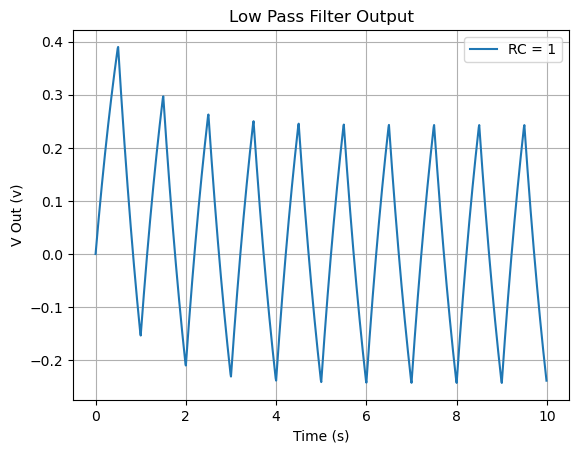

In [19]:
# Case 1 --> RC = 1

import numpy as np
import matplotlib.pyplot as plt 

def f(v,t):
    if np.floor(2 * t) % 2 == 0:
        return (1 / 1) * (1 - v)
    else:
        return (1 / 1) * (-1 - v)


final_v = []

#initial conditions
first = 0
last = 10
h = (last - first) / 1000
v = 0

t = np.arange(0, 10, h)


for final_t in t:
    final_v.append(v)
    k_1 = h * f(v, final_t)
    k_2 = h * f(v + (1 / 2) * k_1, final_t + (1 / 2) * h)
    k_3 = h * f(v + (1 / 2) * k_2, final_t + (1 / 2) * h)
    k_4 = h * f(v + k_3, final_t + h)
    v += (1 / 6) * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
    
    

plt.plot(t, final_v, label = 'RC = 1')
plt.xlabel('Time (s)')
plt.ylabel('V Out (v)')
plt.title('Low Pass Filter Output')
plt.legend()
plt.grid()
plt.show()





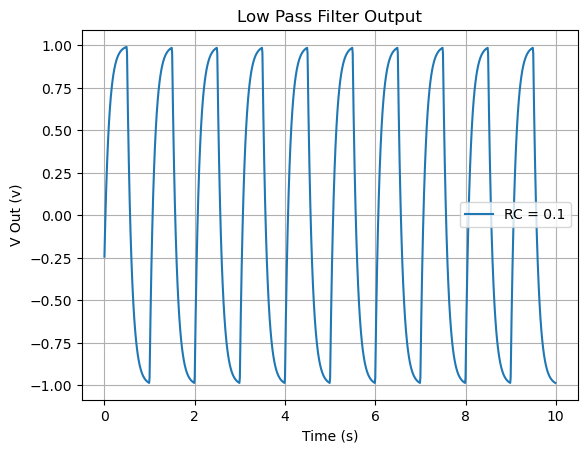

In [20]:
# Case 2 --> RC = 0.1

def f(v,t):
    if np.floor(2 * t) % 2 == 0:
        return (1 / 0.1) * (1 - v)
    else:
        return (1 / 0.1) * (-1 - v)

final_v = []

for final_t in t:
    final_v.append(v)
    k_1 = h * f(v, final_t)
    k_2 = h * f(v + (1 / 2) * k_1, final_t + (1 / 2) * h)
    k_3 = h * f(v + (1 / 2) * k_2, final_t + (1 / 2) * h)
    k_4 = h * f(v + k_3, final_t + h)
    v += (1 / 6) * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
    
plt.plot(t, final_v, label = 'RC = 0.1')
plt.xlabel('Time (s)')
plt.ylabel('V Out (v)')
plt.title('Low Pass Filter Output')
plt.legend()
plt.grid()
plt.show()

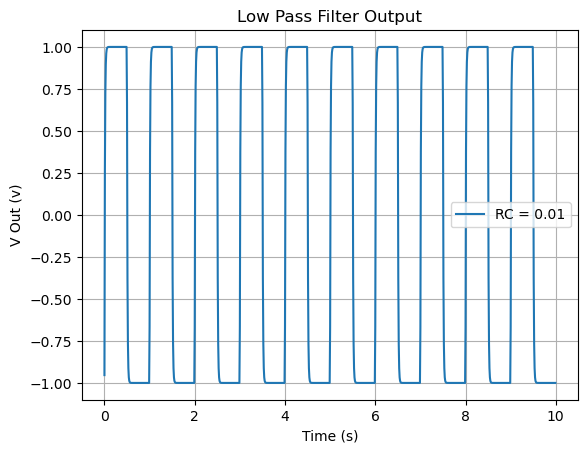

In [21]:
# Case 3 --> RC = 0.01

def f(v,t):
    if np.floor(2 * t) % 2 == 0:
        return (1 / 0.01) * (1 - v)
    else:
        return (1 / 0.01) * (-1 - v)

final_v = []

for final_t in t:
    final_v.append(v)
    k_1 = h * f(v, final_t)
    k_2 = h * f(v + (1 / 2) * k_1, final_t + (1 / 2) * h)
    k_3 = h * f(v + (1 / 2) * k_2, final_t + (1 / 2) * h)
    k_4 = h * f(v + k_3, final_t + h)
    v += (1 / 6) * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
    
    
plt.plot(t, final_v, label = 'RC = 0.01')
plt.xlabel('Time (s)')
plt.ylabel('V Out (v)')
plt.title('Low Pass Filter Output')
plt.legend()
plt.grid()
plt.show()

For the smallest value of RC (0.01), we can observe an output signal as being almost the same as the input step-wise function. It is only slihgtly altered in how it becomes smooth towards the transitions. This filter becomes more apparent in the next RC value (0.1), where there the smoothing is more noticeable. For the RC value of 1, it appears as though the low pass filter is taking effect from t = 0 to t = 4, after which it oscialltes between two smaller values than the initial ones. At lower RC values, the high pass filter circuit is allowing higher signals to go through, but it becomes more effective at filtering the signals for greater RC values.

### Exercise 8.2: The Lotka--Volterra equations

The Lotka--Volterra equations are a
mathematical model of predator--prey interactions between biological
species.  Let two variables $x$ and $y$ be proportional to the size of the
populations of two species, traditionally called "rabbits" (the
prey) and "foxes" (the predators).  You could think of $x$ and $y$ as
being the population in thousands, say, so that $x=2$ means there are 2000
rabbits.  Strictly the only allowed values of $x$ and $y$ would then be
multiples of 0.001, since you can only have whole numbers of rabbits or
foxes.  But 0.001 is a pretty close spacing of values, so it's a decent
approximation to treat $x$ and $y$ as continuous real numbers so long as
neither gets very close to zero.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional
to their population, but are eaten by the foxes at a rate proportional to
both their own population and the population of foxes:

$$
{dx\over dt} = \alpha x - \beta xy,
$$

where $\alpha$ and $\beta$ are constants.  At the same time the foxes
reproduce at a rate proportional the rate at which they eat
rabbits-because they need food to grow and reproduce-but also die of
old age at a rate proportional to their own population:

$$
{dy\over dt} = \gamma xy - \delta y,
$$

where $\gamma$ and $\delta$ are also constants.


- Write a program to solve these equations using the fourth-order
  Runge--Kutta method for the case $\alpha=1$, $\beta=\gamma=0.5$, and
  $\delta=2$, starting from the initial condition $x=y=2$.  Have the
  program make a graph showing both $x$ and $y$ as a function of time on
  the same axes from $t=0$ to $t=30$.  (Hint: Notice that the differential
  equations in this case do not depend explicitly on time $t$; in vector
  notation, the right-hand side of each equation is a function $f(\vec{r})$
  with no $t$ dependence.  You may nonetheless find it convenient to define
  a Python function $\verb|f(r,t)|$ including the time variable, so that your
  program takes the same form as programs given earlier in this chapter.
  You don't have to do it that way, but it can avoid some confusion.) (15 points)
- Describe in words what is going on in the system, in terms of rabbits
  and foxes. (5 points)

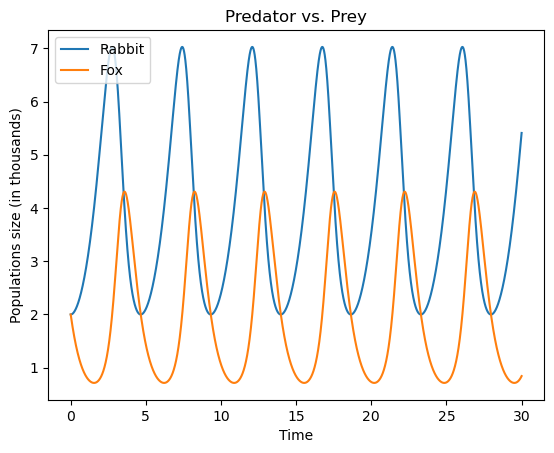

In [22]:
import numpy as np
import matplotlib.pyplot as plt 

def f(r, t):
    x = r[0]
    y = r[1]
    func_y = (1 /2) * x * y - 2 * y
    func_x = x - (1 / 2) * x * y
    ans = np.array([func_x, func_y], float)
    return ans
    

r = np.array([2,2], float) #initial conditions

final_x = []
final_y = []

first = 0
last = 30
h = (last - first) / 10000

t = np.arange(first, last, h)


for final_t in t:    
    final_x.append(r[0])
    final_y.append(r[1])
    
    k_1 = h * f(r, final_t)
    k_2 = h * f(r + (1 / 2) * k_1, final_t + (1 / 2) * h)
    k_3 = h * f(r + (1 / 2) * k_2, final_t + (1 / 2) * h) 
    k_4 = h * f(r + k_3, final_t + h)
    r += (1 / 6) * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
    

plt.plot(t, final_x, label = "Rabbit")
plt.xlabel("Time")
plt.ylabel("Populations size (in thousands)")
plt.title('Predator vs. Prey')
plt.plot(t, final_y, label = "Fox")
plt.legend()
plt.show()

The local maxima's of the rabbit population coincides with the point of greatest positive rate of change in population of foxes - this makes sense since after this point, the increase in the population of foxes leads to them needing more food and therefore a subsequent decline in the population of rabbits. Similarly, for the maxima's of the fox population, it coincides with the greatest negative change in population of rabbits, which also makes sense since at that point, the greatest number of foxes are only able to be sustained through the greatest number of prey. Similar but opposite logic/observation applies to the minima's of both populations

### Exercise 8.3: The Lorenz equations

One of the most celebrated sets of differential equations in
physics is the Lorenz equations:

$$
{dx\over dt} = \sigma(y-x),\qquad
{dy\over dt} = rx - y - xz,\qquad
{dz\over dt} = xy - bz,
$$

where $\sigma$, $r$, and $b$ are constants.  (The names $\sigma$, $r$,
and $b$ are odd, but traditional; they are always used in these equations
for historical reasons.)

These equations were first studied by Edward Lorenz in 1963, who
derived them from a simplified model of weather patterns.  The
reason for their fame is that they were one of the first incontrovertible
examples of *deterministic chaos*, the occurrence of apparently
random motion even though there is no randomness built into the equations.
We encountered a different example of chaos in the logistic map of
Exercise 3.6.


- Write a program to solve the Lorenz equations for the case
  $\sigma=10$, $r=28$, and $b=\frac{8}{3}$ in the range from $t=0$ to $t=50$
  with initial conditions $(x,y,z)=(0,1,0)$.  Have your program make a plot
  of $y$ as a function of time.  Note the unpredictable nature of the
  motion.  (Hint: If you base your program on previous ones, be careful.
  This problem has parameters $r$ and $b$ with the same names as variables
  in previous programs---make sure to give your variables new names, or use
  different names for the parameters, to avoid introducing errors into your
  code.) (20 points)
- Modify your program to produce a plot of $z$ against~$x$.  You should
  see a picture of the famous "strange attractor'' of the Lorenz
  equations, a lop-sided butterfly-shaped plot that never repeats itself. (10 points)

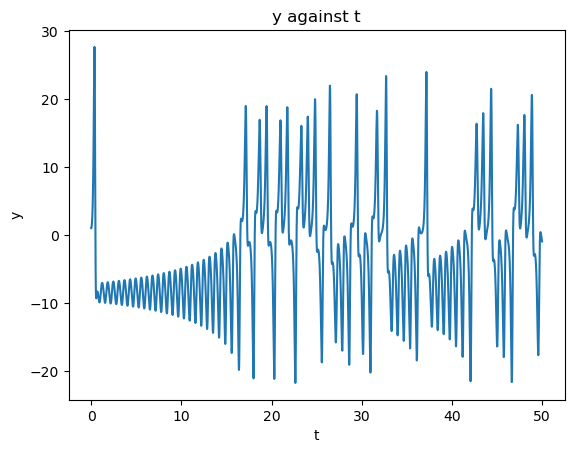

In [23]:
# code
import numpy as np
import matplotlib.pyplot as plt 

def f(r, t):
    x = r[0]
    y = r[1]
    z = r[2]
    func_y = 28 * x - y - x * z
    func_x = 10 * (y - x)
    func_z = x * y - (8 / 3) * z
    ans = np.array([func_x, func_y, func_z], float)
    return ans
    

r = np.array([0,1,0], float) #Initial conditions

final_x = []
final_y = []
final_z = []

first = 0
last = 50
h = (last - first) / 10000 #Step size
t = np.arange(first, last, h)

#Fourth order Runge-Kutta
for final_t in t:
    
    final_x.append(r[0])
    final_y.append(r[1])
    final_z.append(r[2])
    
    k_1 = h * f(r, final_t)
    k_2 = h * f(r + (1 / 2) * k_1, final_t + (1 / 2) * h)
    k_3 = h * f(r + (1 / 2) * k_2, final_t + (1 / 2) * h) 
    k_4 = h * f(r + k_3, final_t + h)
    r += (1 / 6) * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
    
plt.plot(t, final_y)
plt.xlabel('t')
plt.ylabel('y')
plt.title('y against t')
plt.show()

Text(0, 0.5, 'z')

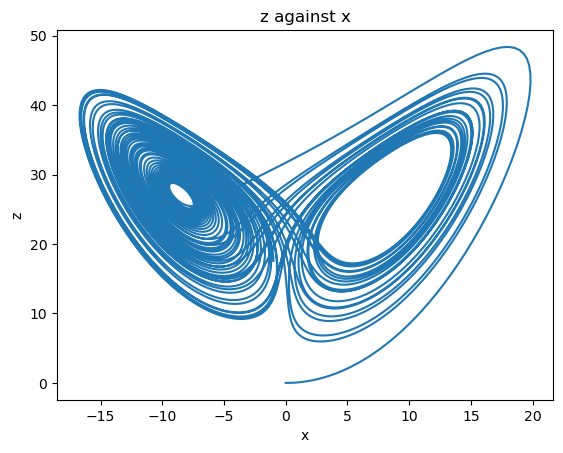

In [24]:
#"Strange attractor" plot

plt.plot(final_x, final_z)
plt.title('z against x')

plt.xlabel('x')
plt.ylabel('z')

### Exercise 8.5: The driven pendulum

A pendulum like the one in Exercise 8.4 can be driven by, for
example, exerting a small oscillating force horizontally on the mass.  Then
the equation of motion for the pendulum becomes

$$
{d^2\theta\over dt^2} = - {g\over\ell}\sin\theta
  + C \cos\theta \sin\Omega t,
$$

where $C$ and $\Omega$ are constants.

- Write a program to solve this equation for $\theta$ as a function of
  time with $\ell=10\,$cm, $C=2\,\mathrm{s}^{-2}$ and
  $\Omega=5\,\mathrm{s}^{-1}$ and make a plot of $\theta$ as a function of
  time from $t=0$ to $t=100\,$.  Start the pendulum at rest with
  $\theta=0$ and $d\theta/d t=0$. (20 points)
- Now change the value of $\Omega$, while keeping $C$ the same, to find
  a value for which the pendulum resonates with the driving force and
  swings widely from side to side.  Make a plot for this case also. (10 points)

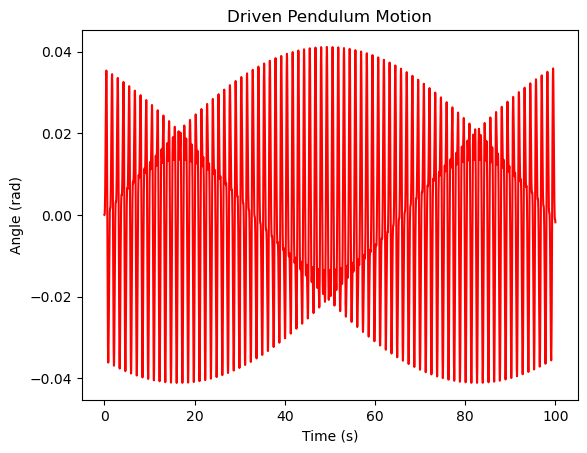

In [25]:
# code

def f(r,t):
    theta = r[0]
    omega = r[1]
    #Doing the following helps sperate our second order diff eq into two first order diff eq's
    d_theta = omega
    d_omega = - (9.81 / 0.1) * np.sin(theta) + 2 * np.cos(theta) * np.sin(5 * t) 
    return np.array([d_theta, d_omega], float)


r = np.array([0,0], float) #Initial condition
final_x = []
final_y = []

first = 0
last = 100
h = (last - first) / 10000
t = np.arange(0, 100, h)


for final_t in t:
    
    final_x.append(r[0]) #theta
    final_y.append(r[1]) #omega
    
    k_1 = h * f(r, final_t)
    k_2 = h * f(r + (1 / 2) * k_1, final_t + (1 / 2) * h)
    k_3 = h * f(r + (1 / 2) * k_2, final_t + (1 / 2) * h) 
    k_4 = h * f(r + k_3, final_t + h)
    r += (1 / 6) * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
    

plt.plot(t, final_x, color = 'red') #theta plot
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Driven Pendulum Motion')
plt.show()



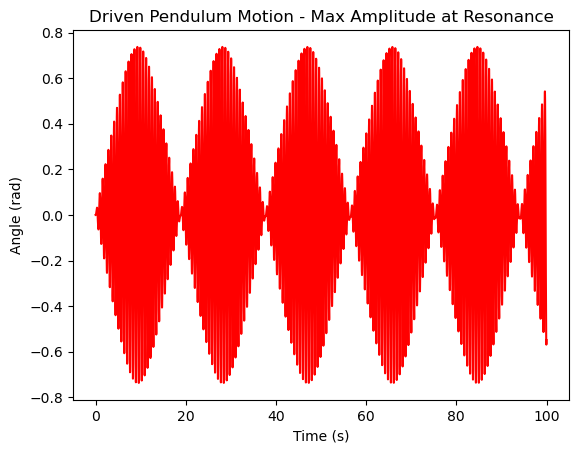

In [26]:

def f(r,t):
    theta = r[0]
    omega = r[1]
    d_theta = omega
    d_omega = - (9.81 / 0.1) * np.sin(theta) + 2 * np.cos(theta) * np.sin(10 * t) #Changed the value for omega to 10 instead of the initial 5
    return np.array([d_theta, d_omega], float)


r = np.array([0,0], float) #Initial condition
final_x = []
final_y = []

first = 0
last = 100
h = (last - first) / 10000
t = np.arange(0, 100, h)


for final_t in t:
    
    final_x.append(r[0]) #theta
    final_y.append(r[1]) #omega
    
    
    k_1 = h * f(r, final_t)
    k_2 = h * f(r + (1 / 2) * k_1, final_t + (1 / 2) * h)
    k_3 = h * f(r + (1 / 2) * k_2, final_t + (1 / 2) * h) 
    k_4 = h * f(r + k_3, final_t + h)
    r += (1 / 6) * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
    

plt.plot(t, final_x, color = 'red') #theta plot
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Driven Pendulum Motion - Max Amplitude at Resonance')
plt.show()

